<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/homework_2/hw2_problem3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [57]:
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [58]:
#try different scalers

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692


In [59]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking
22,8645000,1.337297,0.047278,-0.570187,-0.929397,0.355976
41,7840000,0.557830,0.047278,1.421812,2.532024,-0.805741
91,6419000,0.737707,-1.308863,-0.570187,-0.929397,1.517692
118,5950000,0.585503,0.047278,-0.570187,-0.929397,-0.805741
472,3010000,-0.701308,1.403419,-0.570187,0.224410,2.679409


In [60]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication
y_val = y_val.to_numpy()


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()



X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [61]:
#initalize theta
theta = np.zeros(x_train.shape[1])
theta

array([0., 0., 0., 0., 0., 0.])

In [62]:
def compute_loss(X, y, theta):

    m = len(y)

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [63]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lambda_value, iterations):

    m = len(y_train)  # Number of training examples
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)


    for i in range(iterations):

        predictions = x_train.dot(theta)
        gradients = (1/m)*(x_train.T.dot(predictions-y_train))
        gradients[1:] += (lambda_value/m)*theta[1:]
        theta -= alpha*gradients

        training_loss_history[i] = compute_loss(x_train, y_train, theta)
        validation_loss_history[i] = compute_loss(x_val, y_val, theta)


    return theta, training_loss_history, validation_loss_history

In [64]:
def predict_value(x1,x2,x3, theta):
  input = np.array([1, x1, x2, x3])
  pred_val = input.dot(theta)

  return pred_val

In [65]:
#run gradient decent

theta = np.zeros(x_train.shape[1]) #initialize
iterations = 1000
alpha = 0.01
lambda_value = 20


theta, training_loss_history, validation_loss_history = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, lambda_value, iterations)

print('Final value of theta =', theta)
print('loss_history =', training_loss_history[:5])
print('val_history =', validation_loss_history[:5])


Final value of theta = [4774461.23863707  707076.15051333   95372.41214312  617934.48556889
  440043.1081864   285957.89809936]
loss_history = [1.29727833e+13 1.27127328e+13 1.24585045e+13 1.22099582e+13
 1.19669573e+13]
val_history = [1.23272442e+13 1.20807728e+13 1.18398298e+13 1.16042812e+13
 1.13739961e+13]


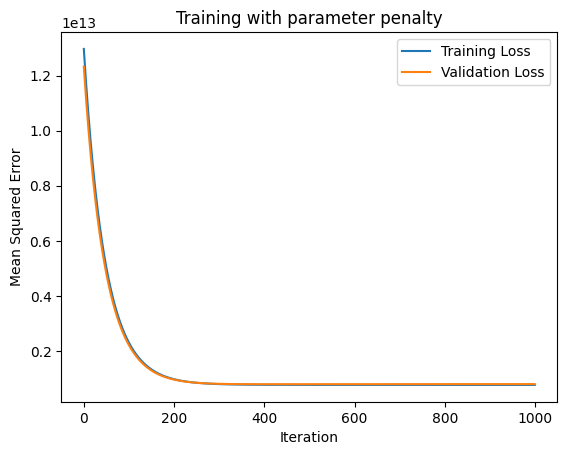

In [66]:
# Plot the training and validation loss after each iteration
plt.plot(training_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training with parameter penalty")
plt.show()